In [1]:
import numpy as np
import torch
from scipy.integrate import odeint
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from torch import nn, autograd
from src.fcn import FullyConnectedNet
from src.fcn import FullyConnectedNetTanh
from src.fcn import CustomFCN
from src.fcn import FCN
from src.transformer_nn import TransformerModel
#from src.transformer_nn import SimpleLinearModel
from src.duffing_generator import DuffingGeneratorClass
from src.physics_loss import physics_loss_class
import torch.optim as op 
%load_ext jupyter_ai
import torch.optim as optim
#from torch.utils.data import Data
import transformers #import Transformer


In [2]:

# Example initialization
n_param_features = 5  # Number of parameter features
n_time_features = 1  # Number of time features
total_features = 6
n_hidden = 128  # Number of hidden units
n_layers = 256 # Number of layers
torch.manual_seed(123)
#model = CustomFCN(num_parameters, n_hidden, n_layers)
# Initialize model, optimizer, and loss function
model = FullyConnectedNetTanh( n_time_features, n_param_features, n_hidden, n_layers)
#model = FCN(N_INPUT=5, N_OUTPUT=1, N_HIDDEN=5, N_LAYERS=2)
#model = TransformerModel(n_time_features, n_param_features, n_hidden, n_layers, n_heads).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_instance = physics_loss_class()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

Batch 0, Total Loss: 0.023369722068309784
Batch 1, Total Loss: 0.01969127729535103
Batch 2, Total Loss: 0.019367316737771034
Batch 3, Total Loss: 0.02790980413556099
Batch 4, Total Loss: 0.016446484252810478
Batch 5, Total Loss: 0.02108301967382431
Batch 6, Total Loss: 0.003927950747311115
Batch 7, Total Loss: 0.049530066549777985
Batch 8, Total Loss: 0.01844067871570587
Batch 9, Total Loss: 0.008396755903959274
Batch 10, Total Loss: 0.008212883025407791
Batch 11, Total Loss: 0.008018312975764275
Batch 12, Total Loss: 0.01356708537787199
Batch 13, Total Loss: 0.007191264070570469
Batch 14, Total Loss: 0.01662299409508705
Batch 15, Total Loss: 0.005788328591734171
Batch 16, Total Loss: 0.013654649257659912
Batch 17, Total Loss: 0.01811610348522663
Batch 18, Total Loss: 0.03979454189538956
Batch 19, Total Loss: 0.004114493262022734
Batch 20, Total Loss: 0.0036653573624789715
Batch 21, Total Loss: 0.007029930129647255
Batch 22, Total Loss: 0.00853712297976017
Batch 23, Total Loss: 0.00231

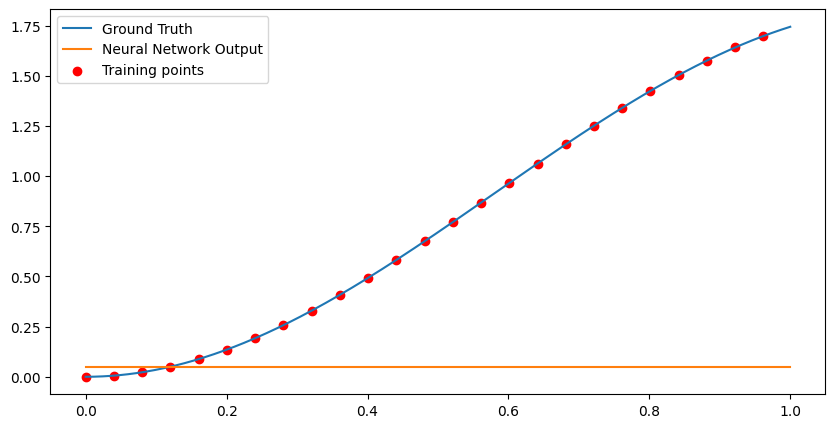

Batch 0, Total Loss: 0.0032352616544812918
Batch 1, Total Loss: 0.018891215324401855
Batch 2, Total Loss: 0.007465296890586615
Batch 3, Total Loss: 0.026140321046113968
Batch 4, Total Loss: 0.004234364256262779
Batch 5, Total Loss: 0.009069172665476799
Batch 6, Total Loss: 0.004540610127151012
Batch 7, Total Loss: 0.03812924772500992
Batch 8, Total Loss: 0.028536608442664146
Batch 9, Total Loss: 0.020328331738710403
Batch 10, Total Loss: 0.013815272599458694
Batch 11, Total Loss: 0.003945366945117712
Batch 12, Total Loss: 0.044376470148563385
Batch 13, Total Loss: 0.035528190433979034
Batch 14, Total Loss: 0.01456482894718647
Batch 15, Total Loss: 0.021693216636776924
Batch 16, Total Loss: 0.045889586210250854
Batch 17, Total Loss: 0.004560186993330717
Batch 18, Total Loss: 0.02611452527344227
Batch 19, Total Loss: 0.005722101777791977
Batch 20, Total Loss: 0.005019984673708677
Batch 21, Total Loss: 0.026608003303408623
Batch 22, Total Loss: 0.0258653424680233
Batch 23, Total Loss: 0.0

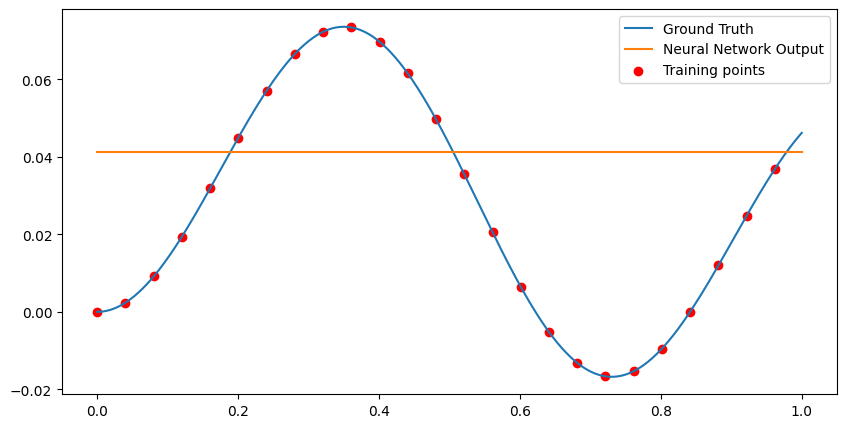

Batch 0, Total Loss: 0.03093167580664158
Batch 1, Total Loss: 0.07070514559745789
Batch 2, Total Loss: 0.014769960194826126
Batch 3, Total Loss: 0.03425747901201248
Batch 4, Total Loss: 0.003811679780483246
Batch 5, Total Loss: 0.0204103272408247
Batch 6, Total Loss: 0.012454336509108543
Batch 7, Total Loss: 0.013156992383301258
Batch 8, Total Loss: 0.009294969961047173
Batch 9, Total Loss: 0.0038304831832647324
Batch 10, Total Loss: 0.01608225144445896
Batch 11, Total Loss: 0.007192061748355627
Batch 12, Total Loss: 0.003475708421319723


In [ ]:
dg = DuffingGeneratorClass()
X = torch.linspace(0, 1, 500)  # Time vector
physics_loss_instance = physics_loss_class()
# Set up the physics loss training locations
x_physics = torch.linspace(0, 1, 30).view(-1, 1).requires_grad_(True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the global time tensor X (ensure it's of appropriate shape and on the correct device)
X= X.to(device)  # Example: torch.linspace(0, 10, steps=1000).view(-1, 1)
x_physics = x_physics.to(device)
# Boundary and other problem-specific configurations
X_BOUNDARY = 0  # Define boundary conditions
F_BOUNDARY = 0  # Define boundary function/values
num_epochs = 1000  # Number of epochs to train
num_batches = torch.tensor(64)  # Number of batches
N = 1 # Number of times to feed each unique set of parameters and X into the model
boundary_loss_weight = 1  # Adjust as necessary
# Set random seed for reproducibility
X = X.view(-1, 1)  # or X.unsqueeze(1)
torch.manual_seed(123)
#device = 'uda'
model.to(device)
for epoch in range(num_epochs):
    model.train()
    total_epoch_loss = 0  # To accumulate loss over the epoch

    # Generate data for all batches
    params, y_physics = dg.duffing_generator_batch(num_batches.item(), X)
    #print("Shape of X:", X.shape)
    #print("Shape of y_physics:", y_physics.shape)
    
    # Transfer the entire dataset to the device at once
    params, y_physics = params.to(device), y_physics.to(device)
    
    for idx in range(num_batches.item()):
        optimizer.zero_grad()
        total_batch_loss = 0  # To accumulate loss over the batch for N iterations

        for _ in range(N):
            # Accessing parameters and y_physics for the current batch
            current_params = params[idx]  # No need to unsqueeze here as we have a clear batch dimension
            current_y_physics = y_physics[idx]

            # Create the combined input tensor for the current batch
            #combined_input = torch.cat((X, current_params), dim=1)

            # Selecting a subset of the combined input and corresponding y_physics data
           # x_params_data = combined_input[0:200:20]
            y_data = current_y_physics[0:200:20]

            # Forward pass: compute predicted y by passing x_params_data to the model
            y_pred = model(X[0:200:20],current_params[0:200:20])#.squeeze()  # Ensure dimensions match
            
            # Compute physics loss
            mse_loss = torch.mean((y_pred - y_data) ** 2)

            # Replicate x_boundary to match the size of X or current_params
            x_boundary = torch.tensor([X_BOUNDARY], device=device, dtype=torch.float).repeat(X.size(0), 1).requires_grad_(True)
            f_boundary = torch.tensor([F_BOUNDARY], device=device, dtype=torch.float).repeat(X.size(0), 1)
            
            # Now, x_boundary has the same size in dim 0 as current_params, allowing concatenation
            boundary_input = torch.cat((x_boundary, current_params), dim=1)
            
            # Proceed with model prediction and loss calculation
            yh_boundary = model(x_boundary, current_params)
            loss_boundary = torch.mean((yh_boundary - f_boundary) ** 2)
            #print("Shape of x_physics:", x_physics.shape)
            
            # Slice current_params to fit the size of x_physics dynamically
            params_physics = current_params[:x_physics.size(0), :]
            params_physics.requires_grad_(True)  # Set requires_grad to True
            #print("Shape of params_physics:", params_physics.shape)
            # Compute physics loss
            loss_physics = physics_loss_instance.physics_loss(model, params_physics,x_physics)

            # Combine losses
            total_loss = mse_loss + boundary_loss_weight * loss_boundary + loss_physics
          

            # Backpropagation
            total_loss.backward()
            optimizer.step()
            optimizer.zero_grad()  # Clear gradients for the next mini-batches
            
            total_batch_loss += total_loss.item()

        # Accumulate epoch loss
        total_epoch_loss += total_batch_loss / N  # Average loss per batch
    # Log or print epoch-wise total loss here if desired
        print(f"Batch {idx}, Total Loss: {total_loss.item()}")
    # Logging
    print(f"Epoch {epoch+1}, Total Loss: {total_epoch_loss}")

    # Adjust learning rate based on scheduler
    scheduler.step()

      # Visualization every epoch
    if (epoch+1) % 1 == 0:   
        yh = model(x_boundary, current_params).cpu().detach().numpy()
        plt.figure(figsize=(10, 5))
        plt.plot(X.cpu().numpy(), y_physics[idx].cpu().numpy(), label='Ground Truth')
        plt.plot(X.cpu().numpy(), yh, label='Neural Network Output')
        plt.scatter(X[0:600:20].cpu(), y_physics[idx][0:600:20].cpu().numpy(), color='red', label='Training points')
        plt.legend()
        plt.show()
  
 
    # Optional: Add validation logic here

# Optional: Save the model after training
# torch.save(model.state_dict(), 'model.pth')

In [ ]:
print(torch.cuda.is_available())

In [ ]:
for epoch in range(num_epochs):
    total_loss = 0
# Example correction for indexing issue

    for idx, (params, y_physics) in enumerate(zip(*dg.duffing_generator_batch(num_batches, x))):
        # Ensure params and y_physics are on the correct device
        params, y_physics = params.to(device), y_physics.to(device)
        optimizer.zero_grad()

        # Corrected indexing logic here
        # Ensure indices are within the bounds of x's size
        # This might involve revising how you generate or use indices
        
        # Correct the sampling logic to match the unexpanded size of x
        indices_corrected = torch.arange(0, x.size(0), step).long()  # Adjust step as needed
        
        # Use the corrected indices to sample from x
        x_sampled = x[indices_corrected].to(device)  # Ensure this matches the expected model input size
        

        indices = torch.arange(0, params.shape[0], step).long()
        params_sampled = params[indices]
        y_physics_sampled = y_physics[indices]
        # Use the corrected indices to sample from x
        x_sampled = x[indices_corrected].to(device)
        # Then use x_sampled in the model prediction instead of x[indices].to(device)
        y_pred = model(x_sampled, params_sampled)
        mse_loss = torch.mean((y_pred - y_physics_sampled) ** 2)

        # Compute physics loss here if applicable
        # Assume `physics_loss` is a function or part of `model` that calculates the physics-based loss
        # This step will depend on the specifics of your model and physics loss calculation
        physics_loss = physics_loss_function(model, x[indices].to(device), params_sampled)

        total_loss = mse_loss + boundary_loss_weight * physics_loss
        total_loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Batch {idx}, Total Loss: {total_loss.item()}")

    
           # Example print statement (you might have your own logging)
        print(f"Batch {idx}, Total Loss: {total_loss}")
          # Visualization every few epochs (e.g., every 2 epochs)
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            
            yh_full = model(x,params).cpu().numpy()  # Predicted values
      

            # Assuming 'y_true_full' is the ground truth corresponding to 'x_full'
            # You need to adjust this to match how your actual ground truth data is obtained
            y_true_full = y_physics  # Placeholder, replace with actual ground truth data

            # Plotting,
            plt.figure(figsize=(10, 5))
            plt.plot(x, y_true_full, label='Ground Truth', linestyle='--')
            plt.plot(x, yh_full, label='Neural Network Output')
            plt.scatter(x_data.numpy(), y_data.numpy(), color='red', label='Training points')  # Adjust as needed
            plt.legend()
            plt.title(f"Epoch {epoch + 1}/{num_epochs}")
            plt.show()